In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

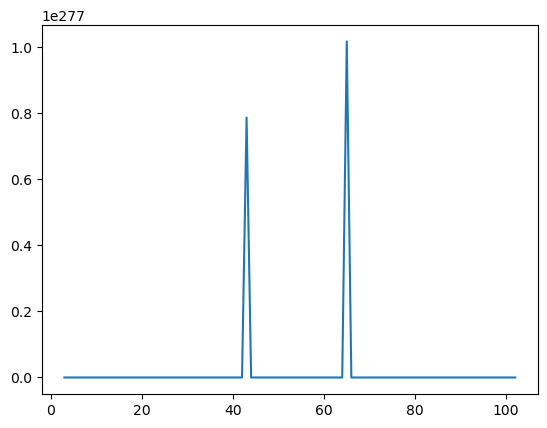

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
                                                    diabetes['target'], random_state=42)
from sklearn.neighbors import KNeighborsRegressor
K_max = 100 # maximal number of nearest neighbours to consider
import numpy as np
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
knn.fit(X_train, y_train)
results[k] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+3,results)


In [4]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
cross_val_score(knn, X_train, y_train)

array([0.28743721, 0.24283699, 0.32312734, 0.32108514, 0.12845082])

In [6]:
from sklearn.utils import shuffle
X, y = shuffle(diabetes.data, diabetes.target, random_state=42)
print(cross_val_score(knn, X, y))


[0.36498737 0.32300369 0.26748019 0.43230668 0.40572547]


In [7]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.37222167132521977

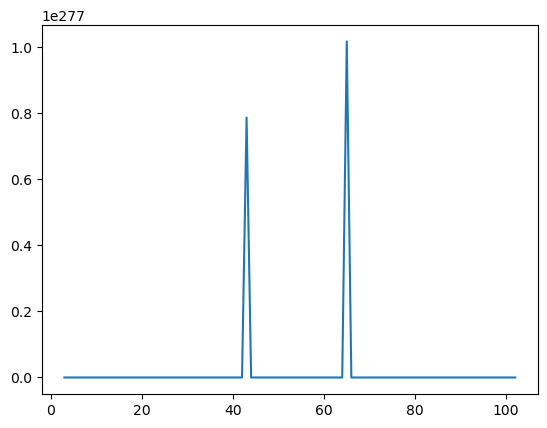

In [8]:
K_max = 100 # maximal number of nearest neighbours to consider
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+3,results)

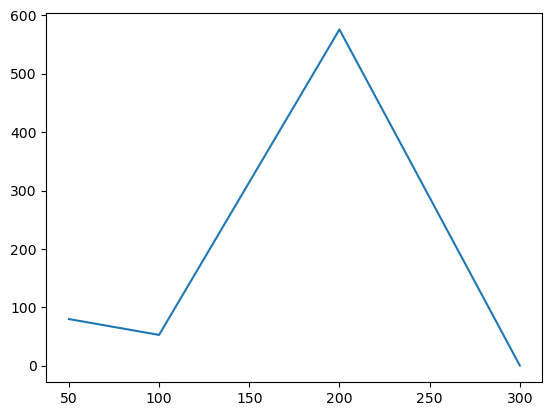

In [9]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,100,200,300]) # sizes of training sets that we will try

results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                        diabetes.target, train_size=train_sizes[k], random_state=42)
knn.fit(X_train, y_train)
results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)


In [10]:
n = 99 # we are in the morning of the 100th day
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[ 222696.01205567  300619.03930609 -381574.17505483 -428650.68863272
 -407305.37923963  291493.54867926  470860.47319899 -467519.49215117
 -120894.88893638 -325883.58181384 -114364.20609529 -260635.38469719
  -10802.11884351 -170552.76286405  326182.20544662  276956.25382523
   89605.87921627 -273437.65767388 -131560.16920239  432750.11938215
 -113782.53741501 -258218.46583476   69118.09295096 -314748.17599878
  418989.21117367 -224757.25768748 -309211.42219515 -324789.48277344
 -342950.06577988 -387321.43052972   80172.73953184  115213.03151808
 -235323.09426814  271195.69235898 -309016.28089337  209985.13179246
 -257162.13564708 -371994.15087883 -462600.60051122  132012.39053304
  -77672.3703976  -153159.03515637 -422293.02362319  141881.78403944
  -54715.24747264 -390634.64493056 -498931.6618801  -442919.4999026
  144336.91256928 -246862.66977084 -176060.72712203 -129589.98095472
 -217988.66578149  208905.65532946  417216.29103787  -26718.86862248
   35206.03351915 -244568.86620658 

In [11]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

208905.65532946412


In [12]:
np.floor(4.5)

4.0

In [13]:
import math
def VaR(L):
    """Value at Risk (a primitive conformal predictor)"""
    if L.size>=4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

In [14]:
N = 500 # the number of days
# The losses on those days:
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [15]:
successes = np.empty(N)
for n in range(N):
    # This is what happens on the (n+1)st day:
    V = VaR(L[:n]) # VaR for the (n+1)st day
    if L[n]<=V:
        successes[n] = 1 # our VaR worked
    else:
        successes[n] = 0 # it didn't
print(np.mean(successes))

0.82


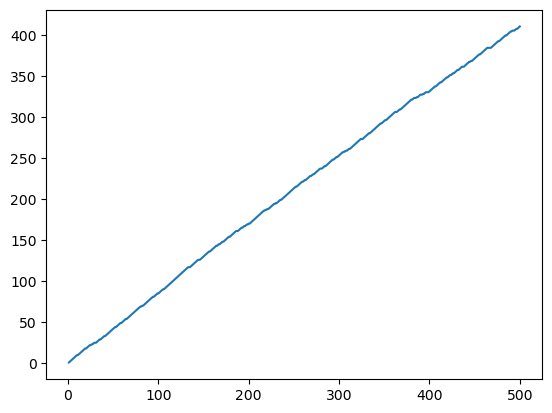

In [16]:
plt.plot(np.arange(N)+1,np.cumsum(successes))